## Imports

In [381]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, StackingRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector

import warnings
warnings.filterwarnings('ignore')

## Load Data

In [382]:
clean_df = pd.read_csv('data/cleaned_data.csv')
clean_df.head()

,YearStart,YearEnd,total_count,state_1,state_2,state_3,state_4,state_5,state_6,state_7,...,condition_description_19,condition_description_20,condition_description_21,condition_description_22,condition_description_23,condition_description_24,condition_description_25,condition_description_26,condition_description_27,condition_description_28
0,2010.0,2010.0,-0.332951,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2011.0,2011.0,-0.329448,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2016.0,2016.0,-0.331530,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019.0,2019.0,-0.328889,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016.0,2016.0,-0.328483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [383]:
df = pd.read_csv('data/U.S._Chronic_Disease_Indicators__CDI_.csv')
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2014,2014,AR,Arkansas,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,5,AST,AST3_1,NMBR,GENDER,GENM,NaN,NaN,NaN,NaN
1,2018,2018,CO,Colorado,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,8,AST,AST3_1,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
2,2018,2018,DC,District of Columbia,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,11,AST,AST3_1,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
3,2017,2017,GA,Georgia,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,13,AST,AST3_1,NMBR,GENDER,GENF,NaN,NaN,NaN,NaN
4,2010,2010,MI,Michigan,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,26,AST,AST3_1,NMBR,RACE,HIS,NaN,NaN,NaN,NaN


In [384]:
df_filtered = df[df['DataValueType'] == 'Number']
df_filtered.to_csv('data/df_filtered.csv')
df_filtered.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2014,2014,AR,Arkansas,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,5,AST,AST3_1,NMBR,GENDER,GENM,NaN,NaN,NaN,NaN
1,2018,2018,CO,Colorado,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,8,AST,AST3_1,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
2,2018,2018,DC,District of Columbia,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,11,AST,AST3_1,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
3,2017,2017,GA,Georgia,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,13,AST,AST3_1,NMBR,GENDER,GENF,NaN,NaN,NaN,NaN
4,2010,2010,MI,Michigan,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,26,AST,AST3_1,NMBR,RACE,HIS,NaN,NaN,NaN,NaN


## Preprocessing / Data Exploration

In [385]:
# remove columns
df_filtered = df_filtered.drop(
    ['LocationAbbr', 
     'DataSource', 
     'DataValueUnit', 
     'LocationID', 
     'StratificationCategoryID1', 
     'StratificationID1', 
     'StratificationCategoryID2',
     'StratificationID2', 
     'StratificationCategoryID3', 
     'StratificationID3',
     'Stratification1',
     'StratificationCategory2',
     'Stratification2',
     'StratificationCategory3',
     'Stratification3',
     'GeoLocation',
     'DataValueTypeID',
     'StratificationCategory1',
     'ResponseID',
     'TopicID',
     'QuestionID',
     'DataValueFootnoteSymbol',
     'DataValueType',
     'DatavalueFootnote',
     'Response',
     'LowConfidenceLimit',
     'HighConfidenceLimit',
     'DataValueAlt'], axis=1)


In [386]:
# Remove DataValue rows that are blank
df_filtered = df_filtered[df_filtered['DataValue'].notnull()]

In [387]:
df_filtered.shape

(71811, 6)

In [388]:
df_filtered.sample(5)

,YearStart,YearEnd,LocationDesc,Topic,Question,DataValue
435373,2018,2018,Georgia,Diabetes,Hospitalization with diabetes as a listed diag...,3152.0
216355,2019,2019,Utah,Chronic Kidney Disease,Mortality with end-stage renal disease,1707.0
378626,2018,2018,California,Cardiovascular Disease,Hospitalization for heart failure among Medica...,4783.0
517977,2013,2013,North Carolina,Overarching Conditions,Premature mortality among adults aged 45-64 years,10562
379656,2012,2012,Delaware,Cardiovascular Disease,Hospitalization for heart failure among Medica...,964.0


In [389]:
df_filtered.nunique()

YearStart          13
YearEnd            13
LocationDesc       53
Topic              10
Question           34
DataValue       20276
dtype: int64

In [390]:
# find values of Topic
df_filtered['Topic'].unique()

array(['Asthma', 'Chronic Kidney Disease',
       'Chronic Obstructive Pulmonary Disease', 'Cardiovascular Disease',
       'Diabetes', 'Alcohol', 'Tobacco',
       'Nutrition, Physical Activity, and Weight Status', 'Older Adults',
       'Overarching Conditions'], dtype=object)

In [391]:
df_filtered["YearStart"].unique()

array([2014, 2018, 2017, 2010, 2013, 2016, 2015, 2020, 2012, 2019, 2011,
       2001, 2009], dtype=int64)

In [392]:
df_filtered["YearEnd"].unique()

array([2014, 2018, 2017, 2010, 2013, 2016, 2015, 2020, 2012, 2019, 2011,
       2001, 2009], dtype=int64)

In [393]:
# df_filtered['YearStart'] = pd.to_datetime(df_filtered['YearStart'])
# df_filtered['YearEnd'] = pd.to_datetime(df_filtered['YearEnd'])

In [394]:
# Convert DataValue to float
df_filtered['DataValue'] = df_filtered['DataValue'].astype(float)

In [395]:
# remove locationdesc that equals United States
df_filtered = df_filtered[df_filtered['LocationDesc'] != 'United States']

In [396]:
df_filtered.dtypes

YearStart         int64
YearEnd           int64
LocationDesc     object
Topic            object
Question         object
DataValue       float64
dtype: object

In [397]:
# Group by location, year and datavalue
df_final = df_filtered.groupby(['LocationDesc', 'Topic', 'DataValue']).sum().reset_index()
df_final.head()

,LocationDesc,Topic,DataValue,YearStart,YearEnd,Question
0,Alabama,Alcohol,84.0,2015,2015,Chronic liver disease mortality
1,Alabama,Alcohol,90.0,2019,2019,Chronic liver disease mortality
2,Alabama,Alcohol,91.0,2010,2010,Chronic liver disease mortality
3,Alabama,Alcohol,93.0,2013,2013,Chronic liver disease mortality
4,Alabama,Alcohol,96.0,2011,2011,Chronic liver disease mortality


In [398]:
# take the mean of the data value for each location and topic
df_final = df_final[['LocationDesc', 'Topic', 'Question', 'DataValue', 'YearEnd']].groupby(
    ['LocationDesc', 'Topic', 'Question', 'YearEnd']).mean().reset_index()

In [399]:
# rename yearend to year
df_final = df_final.rename(columns={'YearEnd': 'Year'})

In [400]:
df_final.head()

,LocationDesc,Topic,Question,Year,DataValue
0,Alabama,Alcohol,Chronic liver disease mortality,2010,301.2
1,Alabama,Alcohol,Chronic liver disease mortality,2011,329.0
2,Alabama,Alcohol,Chronic liver disease mortality,2012,371.4
3,Alabama,Alcohol,Chronic liver disease mortality,2013,344.4
4,Alabama,Alcohol,Chronic liver disease mortality,2014,407.4


In [401]:
# remove years greater than 2024
df_final = df_final[df_final['Year'] <= 2024]

## Visualizations

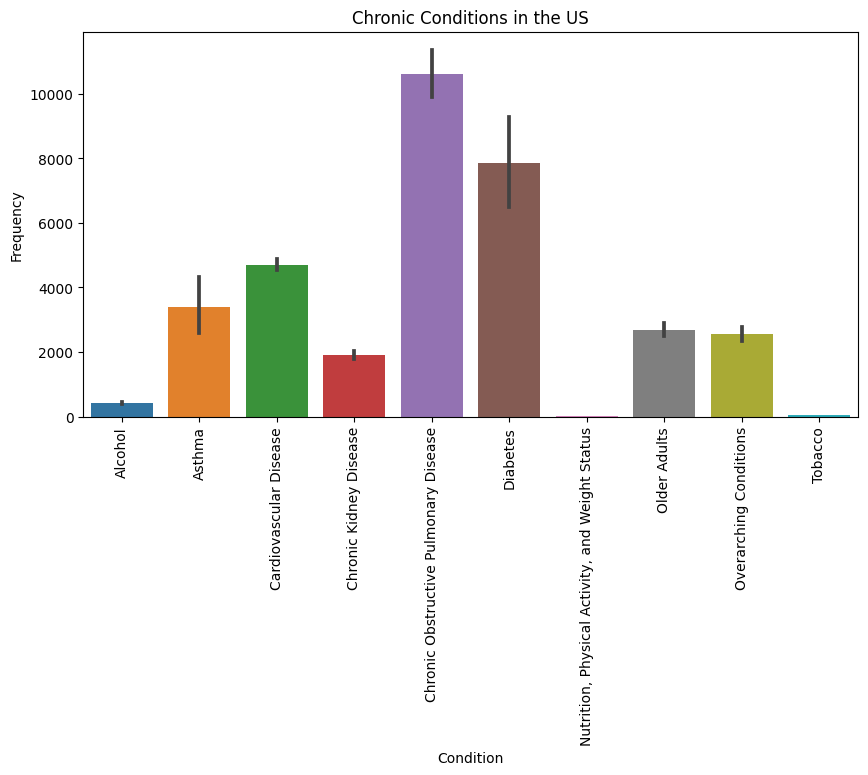

In [402]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Topic', y='DataValue', data=df_final)
plt.xticks(rotation=90)
plt.title('Chronic Conditions in the US')
plt.ylabel('Frequency')
plt.xlabel('Condition')
plt.show()



In [403]:
# print values of graph
df_final.groupby('Topic')['DataValue'].mean().sort_values(ascending=False)

Topic
Chronic Obstructive Pulmonary Disease              10607.384823
Diabetes                                            7857.586232
Cardiovascular Disease                              4697.244421
Asthma                                              3407.276855
Older Adults                                        2688.081716
Overarching Conditions                              2551.066206
Chronic Kidney Disease                              1897.692201
Alcohol                                              408.186620
Tobacco                                               44.305000
Nutrition, Physical Activity, and Weight Status        4.603333
Name: DataValue, dtype: float64

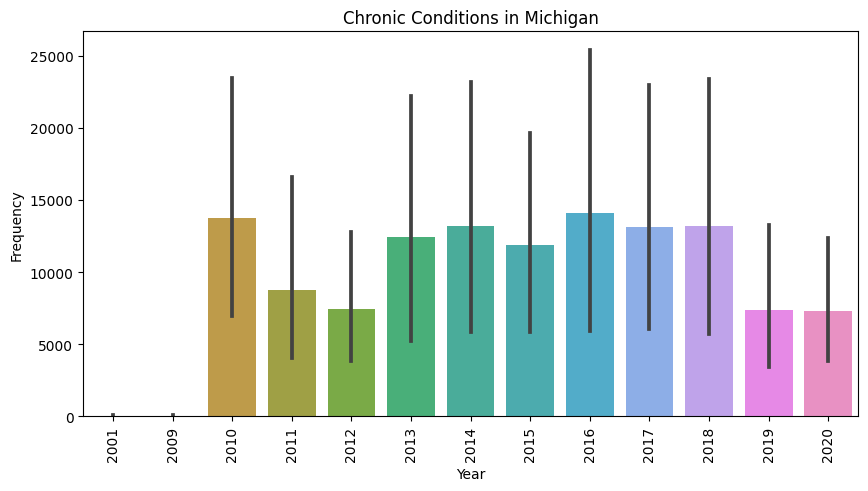

In [404]:
# group by state
df_final_state = df_final.groupby(['LocationDesc'])
df_final_state.head()



# show michigan
df_final_state.get_group('Michigan')

# plot total chronic conditions in michigan year by year
plt.figure(figsize=(10, 5))
sns.barplot(x='Year', y='DataValue', data=df_final_state.get_group('Michigan'))
plt.xticks(rotation=90)
plt.title('Chronic Conditions in Michigan')
plt.ylabel('Frequency')
plt.xlabel('Year')
plt.show()

## Modeling

In [405]:
clean_df.columns

Index(['YearStart', 'YearEnd', 'total_count', 'state_1', 'state_2', 'state_3',
       'state_4', 'state_5', 'state_6', 'state_7', 'state_8', 'state_9',
       'state_10', 'state_11', 'state_12', 'state_13', 'state_14', 'state_15',
       'state_16', 'state_17', 'state_18', 'state_19', 'state_20', 'state_21',
       'state_22', 'state_23', 'state_24', 'state_25', 'state_26', 'state_27',
       'state_28', 'state_29', 'state_30', 'state_31', 'state_32', 'state_33',
       'state_34', 'state_35', 'state_36', 'state_37', 'state_38', 'state_39',
       'state_40', 'state_41', 'state_42', 'state_43', 'state_44', 'state_45',
       'state_46', 'state_47', 'state_48', 'state_49', 'state_50', 'state_51',
       'state_52', 'state_53', 'condition_1', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'condition_6', 'condition_7',
       'condition_description_1', 'condition_description_2',
       'condition_description_3', 'condition_description_4',
       'condition_description_

In [406]:
clean_df.dtypes

YearStart                   float64
YearEnd                     float64
total_count                 float64
state_1                     float64
state_2                     float64
                             ...   
condition_description_24    float64
condition_description_25    float64
condition_description_26    float64
condition_description_27    float64
condition_description_28    float64
Length: 91, dtype: object

In [407]:
# X = df_final
X = clean_df.drop(['total_count'], axis=1)
y = clean_df['total_count']

In [408]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [409]:
nums = make_column_selector(dtype_include=['int64', 'float64'])
cats = make_column_selector(dtype_include=['object'])

In [410]:
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, nums),
        ('cat', cat_transformer, cats)
    ], remainder='passthrough')

In [411]:
models = [
    ('lr', LinearRegression()),
    ('rf', RandomForestRegressor(n_estimators=50, random_state=42)),
    ('lasso', Lasso(alpha=1, random_state=42)),    
]

pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', StackingRegressor(estimators=models))
])

In [412]:
demo_model = LinearRegression()
demo_model.fit(X_train, y_train)

LinearRegression()

In [413]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000027F0710C6D0>),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000027F071C3F90>)])),
                ('model',
                 StackingRegressor(estimators=[('rf',
                                                RandomForestRegressor(n_estimators=50,
                                                                      random_state=42)),
                                               ('lasso',
                                                Lasso(alpha=1,
                                                      random_state=42))]))])

In [414]:
demo_preds = demo_model.predict(X_test)

In [415]:
pred = pipe.predict(X_test) 
pred

array([ 0.20646021,  2.02742797, -0.27624652, ..., -0.16205095,
       -0.37370306, -0.22455001])

In [416]:
mean_squared_error(y_test, demo_preds)

0.5410299157261708

In [417]:
# mean squared error
mean_squared_error(y_test, pred)

0.5453027871454017